In [1]:
import paths
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
expfolder = (paths.results / "server_sample_derivatives") / "SPAMS_DictLr_Ncomps-4_PosCode-False_PosAtoms-True_nIters-300_nInits-50_alpha-2.0_t-15_Act-pos_n-34/"
components = np.load(expfolder / paths.dictcomps_npy_name)
assignments = pd.read_pickle(expfolder / paths.comp_assignments_df_name).reset_index(level="frame_time")
display(components.shape)
assignments


(4, 23662)

block                     frame_time RetainedFrames  DictComp             \
                                               type         0          1   
subj_name       ses_name                                                   
sub-CC00068XX11 ses-20701          7           high  0.000000  15.305612   
                ses-20701          8           high  0.000000  13.817391   
                ses-20701          9           high  0.000000  16.630672   
                ses-20701         10           high  0.000000  16.084889   
                ses-20701         11           high  0.000000  14.948317   
...                              ...            ...       ...        ...   
sub-CC00192AN12 ses-64301       2251           high  0.000000   0.000000   
                ses-64301       2261           high -5.458664   0.000000   
                ses-64301       2269           high  0.000000   4.789304   
                ses-64301       2276           high  7.485418   0.000000   
                ses-64301       2285           high  0.000000   3.913352   

block                                            
                                   2          3  
subj_name       ses_name                         
sub-CC00068XX11 ses-20701 -13.131841   0.000000  
                ses-20701  -6.131786   0.000000  
                ses-20701  -6.251897   0.000000  
                ses-20701   0.000000  -8.705414  
                ses-20701   0.000000 -23.052337  
...                              ...        ...  
sub-CC00192AN12 ses-64301   7.629100  -4.870817  
                ses-64301   6.967791   0.000000  
                ses-64301  -4.071323   0.000000  
                ses-64301   0.000000 -10.808139  
                ses-64301   0.000000  -2.919889  

[11662 rows x 6 columns]

In [3]:
subjs_infos = paths.bids_root / "combined.tsv"
subjs_infos = pd.read_csv(subjs_infos, sep="\t")
subjs_infos['subj_name'] = subjs_infos['participant_id'].apply(lambda x: f"sub-{x}")
subjs_infos['ses_name'] = subjs_infos['session_id'].apply(lambda x: f"ses-{x}")
subjs_infos = subjs_infos.set_index(["subj_name", "ses_name"]).drop(columns=['participant_id', 'session_id'])
subjs_infos.columns = pd.MultiIndex.from_product([['metadata'], subjs_infos.columns])


assignments_metadata_df = assignments.join(subjs_infos, how='left')
assignments_metadata_df

frame_time RetainedFrames  DictComp             \
                                               type         0          1   
subj_name       ses_name                                                   
sub-CC00068XX11 ses-20701          7           high  0.000000  15.305612   
                ses-20701          8           high  0.000000  13.817391   
                ses-20701          9           high  0.000000  16.630672   
                ses-20701         10           high  0.000000  16.084889   
                ses-20701         11           high  0.000000  14.948317   
...                              ...            ...       ...        ...   
sub-CC00192AN12 ses-64301       2251           high  0.000000   0.000000   
                ses-64301       2261           high -5.458664   0.000000   
                ses-64301       2269           high  0.000000   4.789304   
                ses-64301       2276           high  7.485418   0.000000   
                ses-64301       2285           high  0.000000   3.913352   

                                                   metadata            \
                                   2          3 scan_number singleton   
subj_name       ses_name                                                
sub-CC00068XX11 ses-20701 -13.131841   0.000000           1         S   
                ses-20701  -6.131786   0.000000           1         S   
                ses-20701  -6.251897   0.000000           1         S   
                ses-20701   0.000000  -8.705414           1         S   
                ses-20701   0.000000 -23.052337           1         S   
...                              ...        ...         ...       ...   
sub-CC00192AN12 ses-64301   7.629100  -4.870817           1         M   
                ses-64301   6.967791   0.000000           1         M   
                ses-64301  -4.071323   0.000000           1         M   
                ses-64301   0.000000 -10.808139           1         M   
                ses-64301   0.000000  -2.919889           1         M   

                                               ...                        \
                          sedation  birth_age  ... qc_fmri_fieldmap_type   
subj_name       ses_name                       ...                         
sub-CC00068XX11 ses-20701    False  40.428571  ...         spin_echo_epi   
                ses-20701    False  40.428571  ...         spin_echo_epi   
                ses-20701    False  40.428571  ...         spin_echo_epi   
                ses-20701    False  40.428571  ...         spin_echo_epi   
                ses-20701    False  40.428571  ...         spin_echo_epi   
...                            ...        ...  ...                   ...   
sub-CC00192AN12 ses-64301    False  34.714286  ...        dual_echo_time   
                ses-64301    False  34.714286  ...        dual_echo_time   
                ses-64301    False  34.714286  ...        dual_echo_time   
                ses-64301    False  34.714286  ...        dual_echo_time   
                ses-64301    False  34.714286  ...        dual_echo_time   

                                                                               \
                          qc_fmri_dvars_z qc_fmri_tsnr_z qc_fmri_mcdc2sbref_z   
subj_name       ses_name                                                        
sub-CC00068XX11 ses-20701        0.216294      -0.319705             0.121056   
                ses-20701        0.216294      -0.319705             0.121056   
                ses-20701        0.216294      -0.319705             0.121056   
                ses-20701        0.216294      -0.319705             0.121056   
                ses-20701        0.216294      -0.319705             0.121056   
...                                   ...            ...                  ...   
sub-CC00192AN12 ses-64301       -1.324322      -1.439998             1.852760   
                ses-64301       -1.324322      -1.439998       

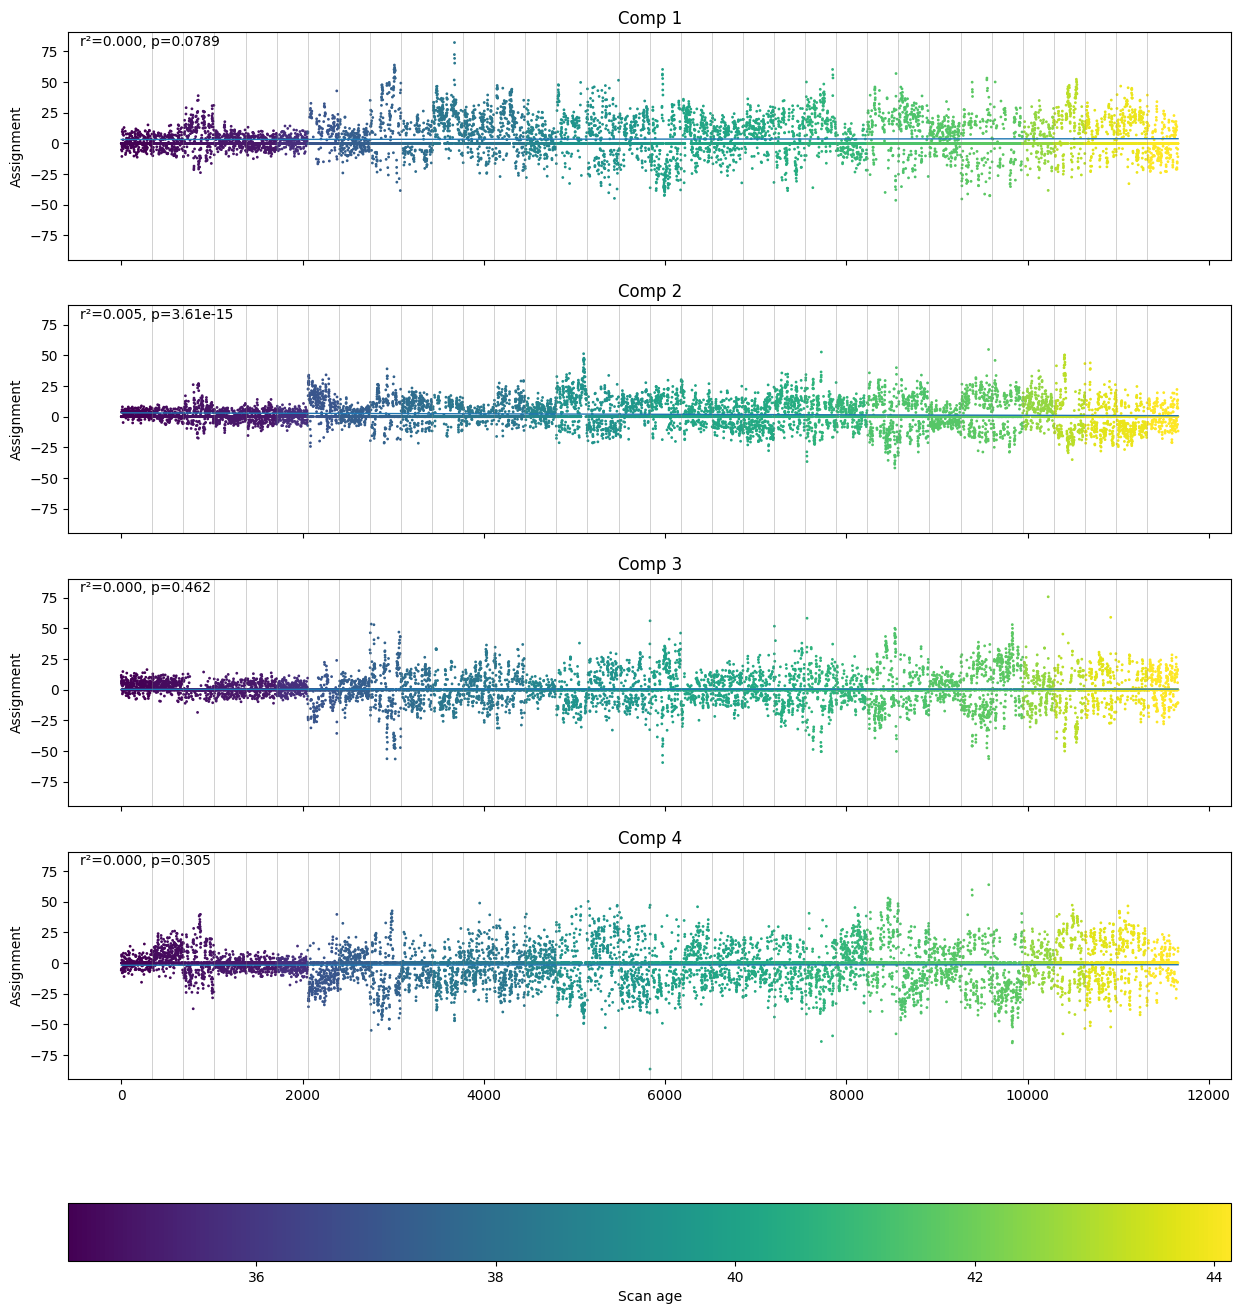

In [4]:
from scipy.stats import linregress

n_comps = components.shape[0]

fig, axes = plt.subplots(n_comps, 1, figsize=(15, 4 * n_comps), sharex=True, sharey=True)

age_sorted_assignments = assignments_metadata_df.sort_values(('metadata', 'scan_age'))

age_sorted_assignments = assignments_metadata_df.sort_values(by=[
    ('metadata', 'scan_age'),
    'subj_name'
])


codes = age_sorted_assignments["metadata", "scan_age"].values
subjects = age_sorted_assignments.index.get_level_values("subj_name")
change_points = np.where(subjects[:-1] != subjects[1:])[0] + 0.5



x = np.arange(len(codes))

for ax, comp in zip(axes, age_sorted_assignments["DictComp"].columns):
    y = age_sorted_assignments["DictComp"][comp].values

    sc = ax.scatter(x, y, c=codes, s=1)
    # sc = ax.plot(x, y )#c=codes, s=1)
    ax.set_ylabel("Assignment")
    ax.set_title(f"Comp {comp+1}")

    slope, intercept, r, p, stderr = linregress(x, y)
    r2 = r ** 2
    ax.plot(x, slope*x + intercept, linewidth=1)


    ax.text(0.01, 0.99,
            f"r²={r2:.3f}, p={p:.3g}",
            transform=ax.transAxes,
            va="top", ha="left")


    for cp in change_points:
        ax.axvline(cp, color="gray", linewidth=0.5, alpha=0.5)


cbar = fig.colorbar(sc, ax=axes.ravel().tolist(), orientation="horizontal", fraction=0.05, pad=0.1)
cbar.set_label("Scan age")
plt.show()


<Axes: xlabel='subj_name,ses_name'>

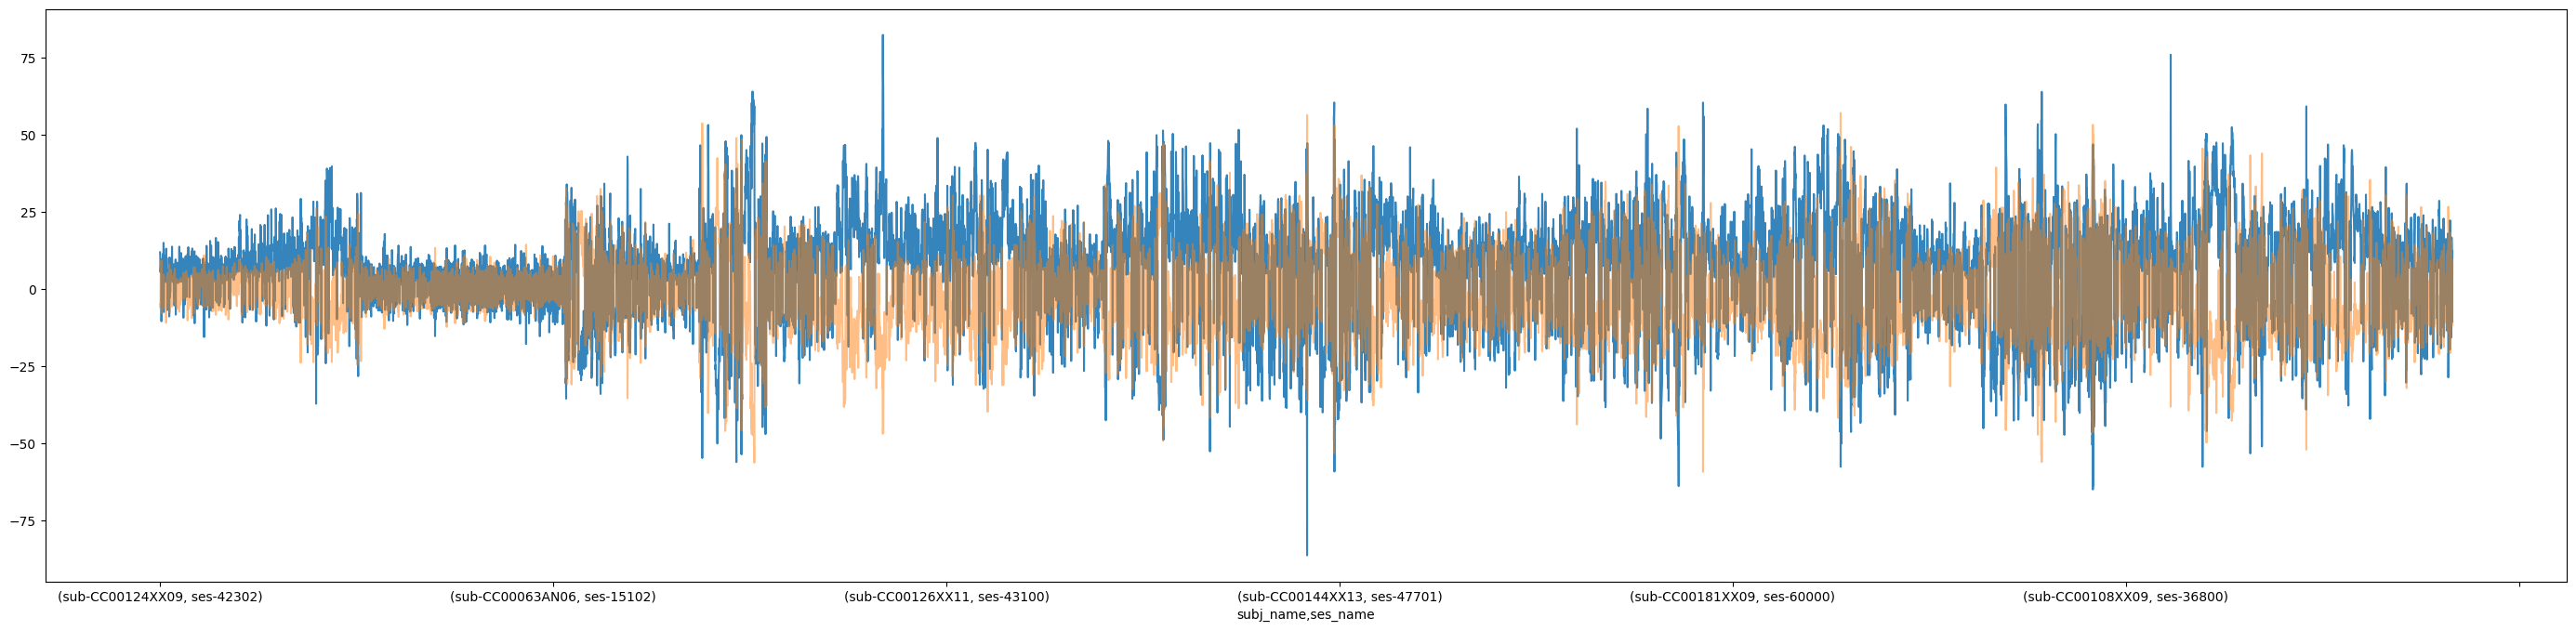

In [8]:
plt.figure(figsize=(35,8))
age_sorted_assignments["DictComp"].apply(lambda row: row.loc[row.abs().sort_values(ascending=False).index[0]] , axis=1).plot(alpha=0.9)
age_sorted_assignments["DictComp"].apply(lambda row: row.loc[row.abs().sort_values(ascending=False).index[1]] , axis=1).plot(alpha=0.5)

<Axes: xlabel='subj_name,ses_name'>

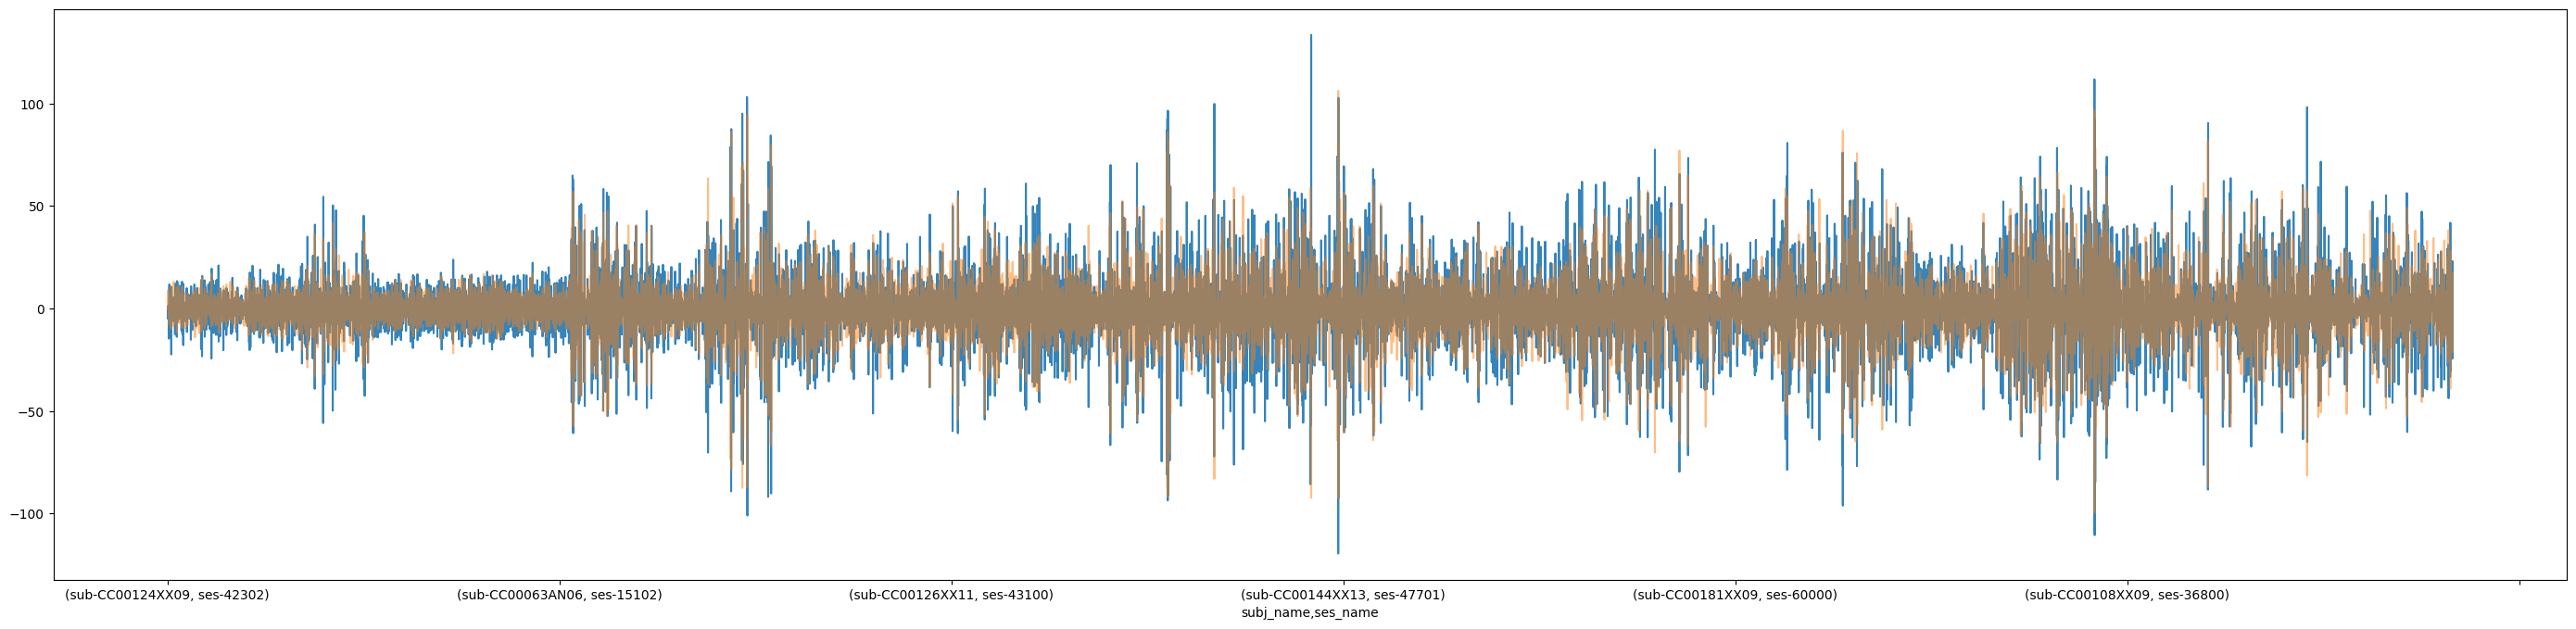

In [9]:
plt.figure(figsize=(35,8))
age_sorted_assignments["DictComp"].apply(lambda row: row.loc[row.abs().sort_values(ascending=False).index[0]] , axis=1).diff().plot(alpha=0.9)
age_sorted_assignments["DictComp"].apply(lambda row: row.loc[row.abs().sort_values(ascending=False).index[1]] , axis=1).diff().plot(alpha=0.5)

<Axes: xlabel='subj_name,ses_name'>

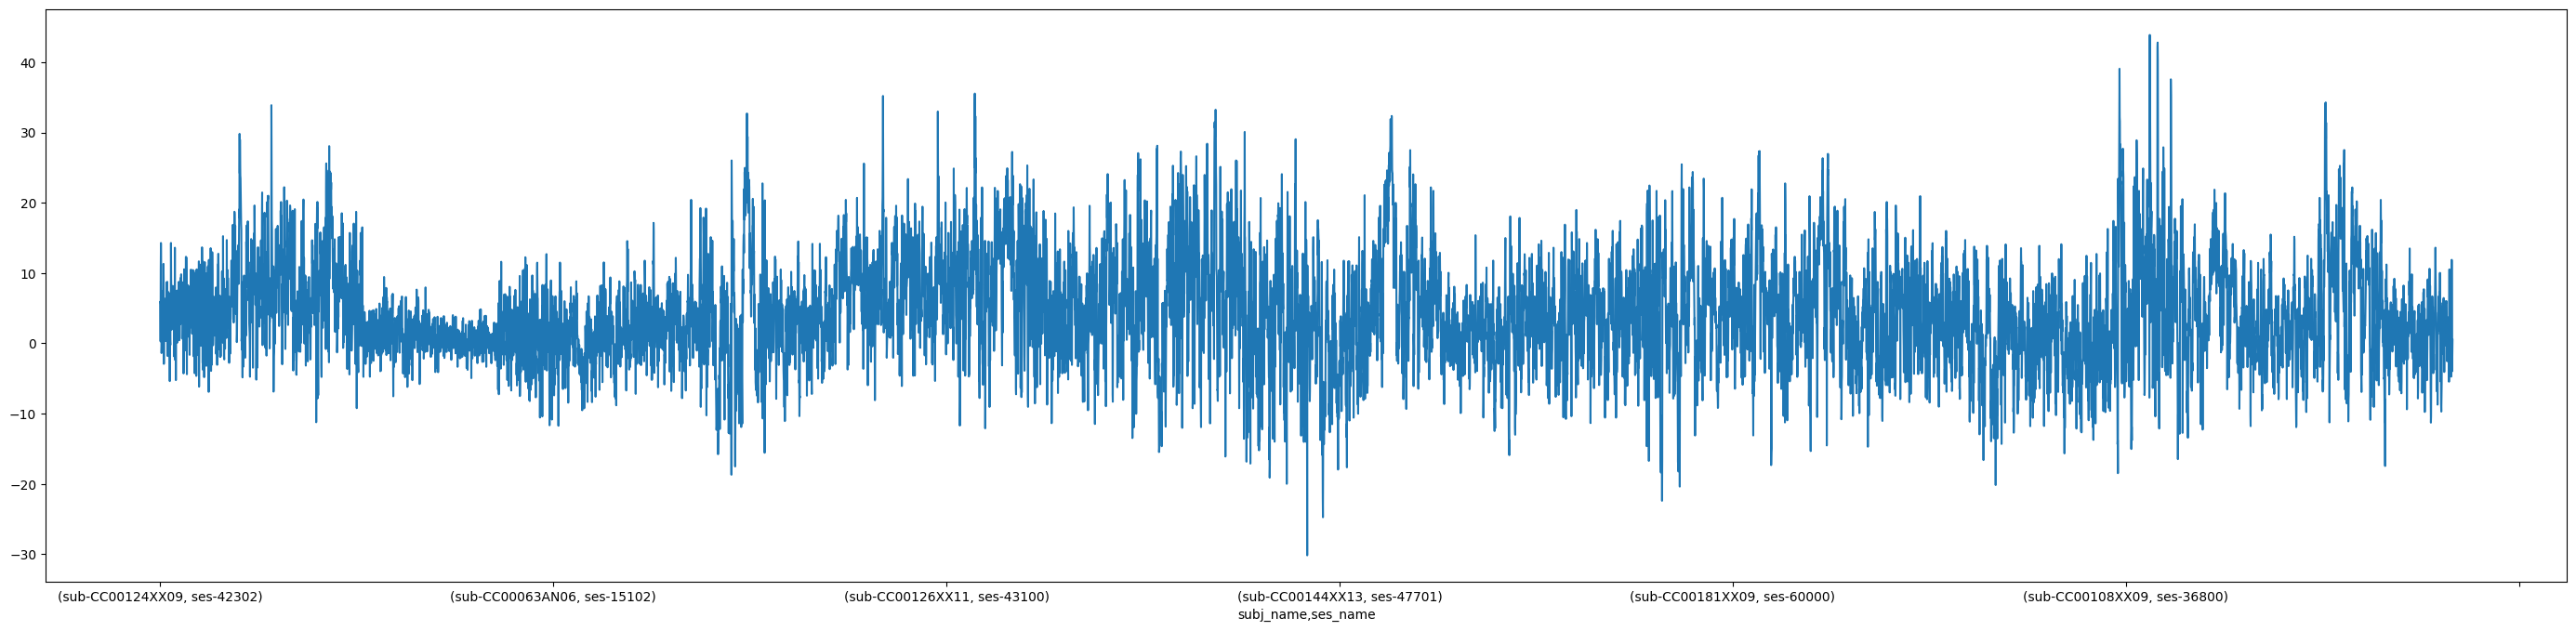

In [10]:
plt.figure(figsize=(35,8))
age_sorted_assignments["DictComp"].sum(axis=1).plot()

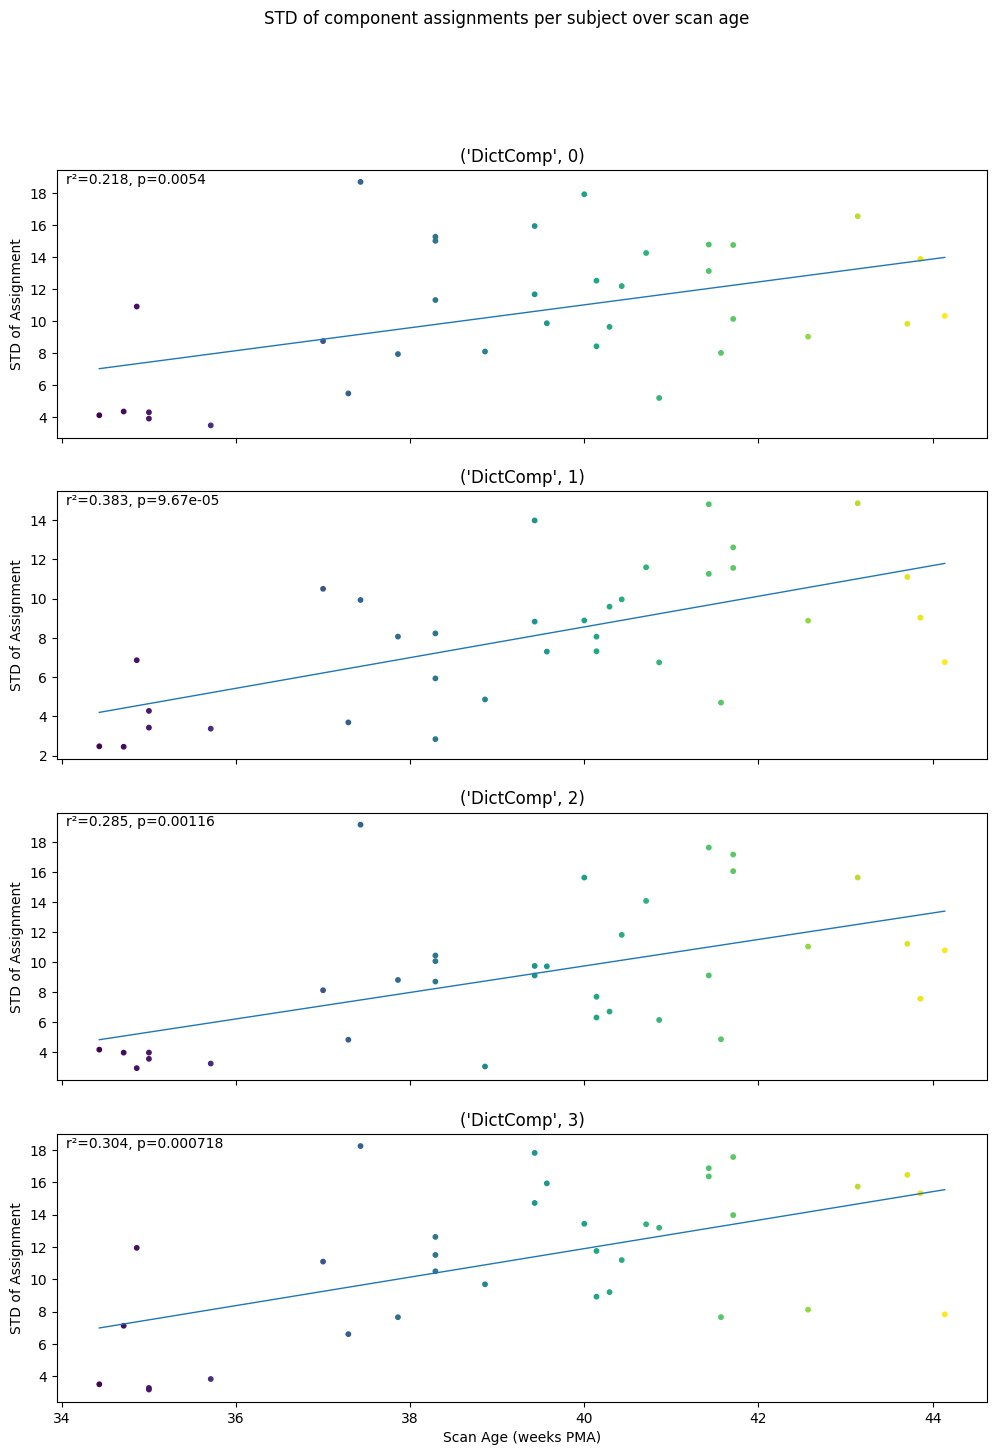

In [11]:
subjGrouped_ageSorted_assignments = age_sorted_assignments.groupby(
    level=['subj_name', 'ses_name'],
    sort=False
)["DictComp"]

fig, axes = plt.subplots(components.shape[0], 1, figsize=(12, 4 * components.shape[0]), sharex=True)
for ax,(comp_idx, comp_value) in zip(axes, subjGrouped_ageSorted_assignments.std().T.iterrows()):
    scan_ages = age_sorted_assignments["metadata", 'scan_age'].groupby(
        level=['subj_name', 'ses_name'],
        sort=False
    ).first().values
    ax.scatter(scan_ages, comp_value, s=10, c=scan_ages)


    slope, intercept, r, p, stderr = linregress(scan_ages, comp_value)
    r2 = r ** 2
    ax.plot(scan_ages, slope*scan_ages + intercept, linewidth=1)


    ax.text(0.01, 0.99,
            f"r²={r2:.3f}, p={p:.3g}",
            transform=ax.transAxes,
            va="top", ha="left")

    ax.set_ylabel("STD of Assignment")
    ax.set_title(f"{comp_idx}")
fig.suptitle("STD of component assignments per subject over scan age")
plt.xlabel("Scan Age (weeks PMA)")
plt.show()